<a href="https://colab.research.google.com/github/RVenkatGitz/Datasharing/blob/master/Logistic_Regression_Titanic_Survial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Ti implement logistic regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

In [3]:
logge=pd.read_csv("/content/train.csv")

In [4]:
logge.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
logge.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#To view which column has null values- Graph

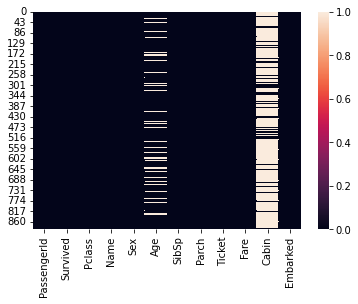

In [7]:
sns.heatmap(logge.isnull())

In [8]:
logge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#To perform data cleansing operations

In [10]:
#Taking measures to remove null values
#To be more precise "pclass" is used as parameter to find average of age to fitted to the null values
#Age to null values are calculated with the average value to people of the paticular "pclass" i.e, peoples age of a paticular pclass is only used to find the average which can used to fit in null values of the paticular "pclass" customer
#Comparing to "age" "pclass" has only three different values so it used in X-axis

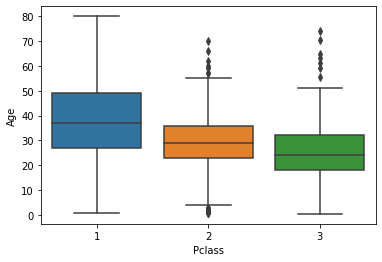

In [14]:
sns.boxplot(x="Pclass", y="Age", data=logge)

In [15]:
#define a function to fit the avergae age into null values of "age" 

In [16]:
def Age_modify(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 30
        else:
            return 27
        
    else:
        return Age

In [17]:
#Calling Age modify Fun() to clear the null values in "age"


In [18]:
logge["Age"]=logge[["Age","Pclass"]].apply(Age_modify,axis=1)

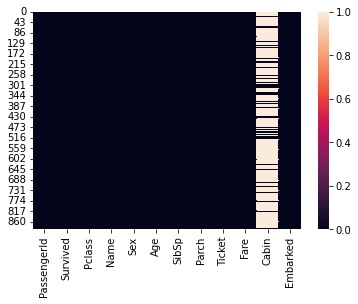

In [19]:
sns.heatmap(logge.isnull())

In [22]:
logge.drop(["Cabin"],axis=1,inplace=True)

In [23]:
logge.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
logge.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


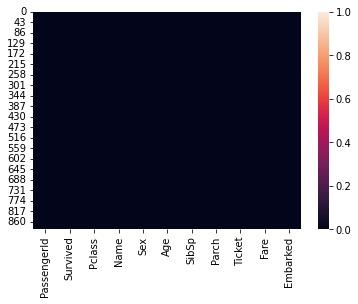

In [25]:
sns.heatmap(logge.isnull())

In [26]:
#To View "sex" ratio of Death
#"sex" col can be used to seggregrate
#similarly embarked

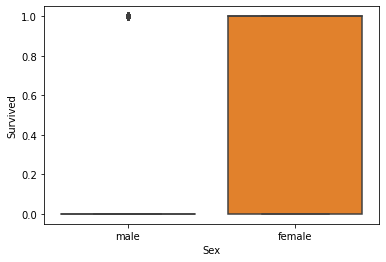

In [28]:
sns.boxplot(x="Sex", y="Survived",data=logge)

In [31]:
sex = pd.get_dummies(logge['Sex'])
embarked = pd.get_dummies(logge['Embarked'])

In [32]:
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [33]:
#since "sex" and "embarked" are 0's and 1's, one of those colums can be eleminated. 


In [35]:
sex = pd.get_dummies(logge['Sex'],drop_first=True)
embarked = pd.get_dummies(logge['Embarked'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [37]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [38]:
#'ticket' col can be used to find which ticket holder survived more


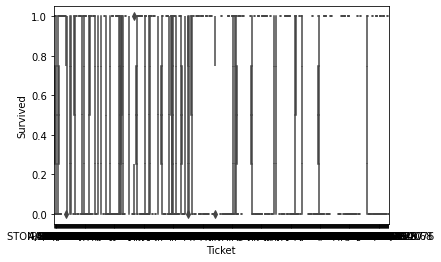

In [40]:
sns.boxplot(x="Ticket", y='Survived',data=logge)

In [41]:
#similarly 'fare'


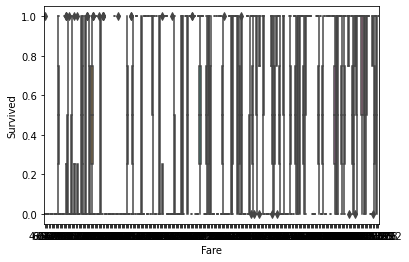

In [42]:
sns.boxplot(x="Fare", y='Survived',data=logge)

In [43]:
#Unimportant cols which are not going affect the outcome are removed


In [44]:
logge.drop(["Sex","Embarked","Ticket","Fare","Name"],axis=1,inplace=True)


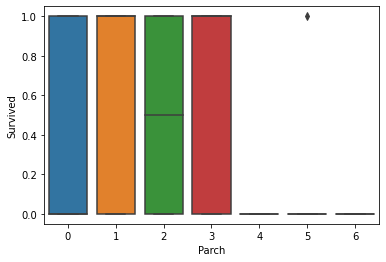

In [45]:
#person those have parch
sns.boxplot(x='Parch', y='Survived', data=logge)

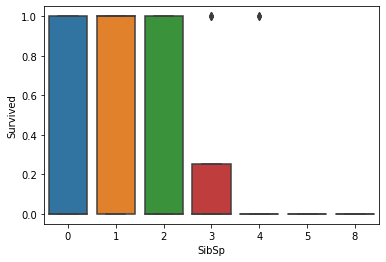

In [48]:
sns.boxplot(x='SibSp', y='Survived', data=logge)

In [49]:
logge.drop(["SibSp","Parch"],axis=1,inplace=True)

In [50]:
logge.head()

,PassengerId,Survived,Pclass,Age
0,1,0,3,22.0
1,2,1,1,38.0
2,3,1,3,26.0
3,4,1,1,35.0
4,5,0,3,35.0


In [51]:
#model building

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = logge.drop(["Survived"],axis=1)
y = logge["Survived"]

In [55]:
X

,PassengerId,Pclass,Age
0,1,3,22.0
1,2,1,38.0
2,3,3,26.0
3,4,1,35.0
4,5,3,35.0
...,...,...,...
886,887,2,27.0
887,888,1,19.0
888,889,3,27.0
889,890,1,26.0


In [56]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logis = LogisticRegression()

In [60]:
logis.fit(X_train,y_train)

LogisticRegression()

In [61]:
predict = logis.predict(X_test)

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       207
           1       0.68      0.43      0.53       150

    accuracy                           0.68       357
   macro avg       0.68      0.64      0.64       357
weighted avg       0.68      0.68      0.66       357



In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
print(confusion_matrix(y_test,predict))

[[176  31]
 [ 85  65]]


In [ ]:
#Thus the Model is build with 81% of accuracy
#lets does the analtics with test Data

In [94]:
TestData=pd.read_csv("/content/test.csv")

In [95]:
TestData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
TestData.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


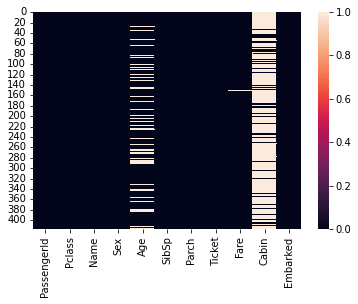

In [97]:
sns.heatmap(TestData.isnull())

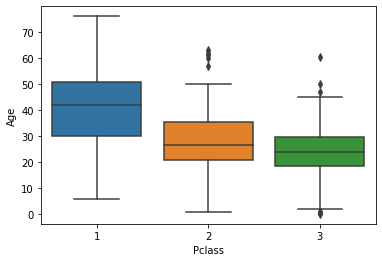

In [98]:
sns.boxplot(x="Pclass",y="Age",data=TestData)

In [99]:
def modify_TDage(cols):
    Age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(Age):
        if pclass ==1:
            return 37
        elif pclass ==2:
            return 27
        else:
            return 25
    else:
       return Age

In [100]:
TestData['Age'] = TestData[['Age','Pclass']].apply(modify_TDage, axis=1)

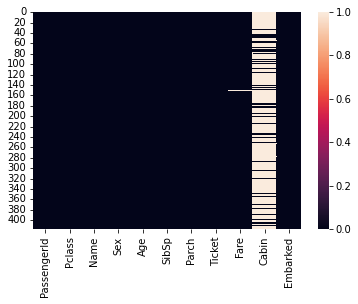

In [101]:
sns.heatmap(TestData.isnull())

In [102]:
sex = pd.get_dummies(TestData['Sex'],drop_first=True)
embarked = pd.get_dummies(TestData['Embarked'],drop_first=True)

In [77]:
sex

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [103]:
embarked

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [105]:
TestData.drop(['Sex','Embarked','Name','Ticket','Pclass','SibSp','Cabin','Fare'],axis=1,inplace=True)

In [106]:
TestData.head()

,PassengerId,Age,Parch
0,892,34.5,0
1,893,47.0,0
2,894,62.0,0
3,895,27.0,0
4,896,22.0,1


In [109]:
TestData = pd.concat([sex,embarked,TestData],axis=1)

In [110]:
TestData.head()

,male,Q,S,male,Q,S,PassengerId,Age,Parch
0,1,1,0,1,1,0,892,34.5,0
1,0,0,1,0,0,1,893,47.0,0
2,1,1,0,1,1,0,894,62.0,0
3,1,0,1,1,0,1,895,27.0,0
4,0,0,1,0,0,1,896,22.0,1


In [111]:
from sklearn.model_selection import train_test_split

In [113]:
XTD=TestData.drop(["S"],axis=1)

In [114]:
yTD = TestData['S']

In [115]:
XTD

,male,Q,male,Q,PassengerId,Age,Parch
0,1,1,1,1,892,34.5,0
1,0,0,0,0,893,47.0,0
2,1,1,1,1,894,62.0,0
3,1,0,1,0,895,27.0,0
4,0,0,0,0,896,22.0,1
...,...,...,...,...,...,...,...
413,1,0,1,0,1305,25.0,0
414,0,0,0,0,1306,39.0,0
415,1,0,1,0,1307,38.5,0
416,1,0,1,0,1308,25.0,0


In [116]:
yTD

,S,S
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
413,1,1
414,0,0
415,1,1
416,1,1


In [117]:
XTD_train,XTD_test, yTD_train,yTD_test = train_test_split(XTD, yTD, test_size=0.40, random_state=101)

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
logisticTD = LogisticRegression()

In [128]:
logisticTD.fit(X_train,y_train)

LogisticRegression()

In [135]:
#Output
#array([[207,   0],
  #     [142,   8]], dtype=int64)
#yTD_test.size
#357